<a href="https://colab.research.google.com/github/bc0403/ML2026/blob/main/lecture_01_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Measure of central tendency
### Definitions
- **mean**: average;
- **median**: middle value from an ordered list; (if length is odd, return the middle value; if length is even, there are two numbers in the middle, then retrun the mean of these two numbers);
- **mode**: most common value;
### Code
- `mean` and `median` are available from `numpy`
- `mode` is available from `scipy.stats`

example 1

In [2]:
import numpy as np

x = [0, 1, 1, 2, 9]

x_mean = np.mean(x)
print(x_mean)

2.6


In [3]:
x_median = np.median(x)
print(x_median)

1.0


In [4]:
from scipy import stats

x_mode = stats.mode(x)
print(x_mode)

ModeResult(mode=np.int64(1), count=np.int64(2))


example 2

In [5]:
speed = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]  # 13 cars speed
speed_mean = np.mean(speed)
print(f"mean speed: {speed_mean:.1f}")

speed_mode = stats.mode(speed)
print(f"mode speed: {speed_mode}")

mean speed: 89.8
mode speed: ModeResult(mode=np.int64(86), count=np.int64(3))


example 3

In [6]:
speed2 = [77, 78, 85, 86, 86, 86, 87, 87, 88, 94, 99, 103, 111]  # length is odd
speed2_median = np.median(speed2)
print(f"when the length is odd ({len(speed2)}), median speed: {speed2_median}")
#

when the length is odd (13), median speed: 87.0


In [7]:
speed3 = [77, 78, 85, 86, 86, 87, 94, 98, 99, 103]  # length is even
speed3_median = np.median(speed3)
print(f"when the length is even ({len(speed3)}), median speed: {speed3_median}")

when the length is even (10), median speed: 86.5


## Measure of Spread
### Definitions
- **range**: max - min; the distance between the smallest and largest values;
- **variance**: average the squared distance from the mean;
- **standard deviation**: the square root of variance;

### Code
- range: `np.ptp`
- variance: `np.var`
- standard deviation: `np.std`; parameter `ddof`, 0 for population and 1 for sample;


In [8]:
data = [-4, -2, 0, -2, 6, 4, 6, 0, -6, 4]

data_range = np.ptp(data)
print(f"range: {data_range}")

data_var = np.var(data, ddof=1)
print(f"variance: {data_var}")

data_std = np.std(data)
print(f"standard deviation: {data_std}")
#

range: 12
variance: 17.822222222222223
standard deviation: 4.004996878900157


## EDA


### boxplot

/tmp/ipython-input-433184228.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(all_data,


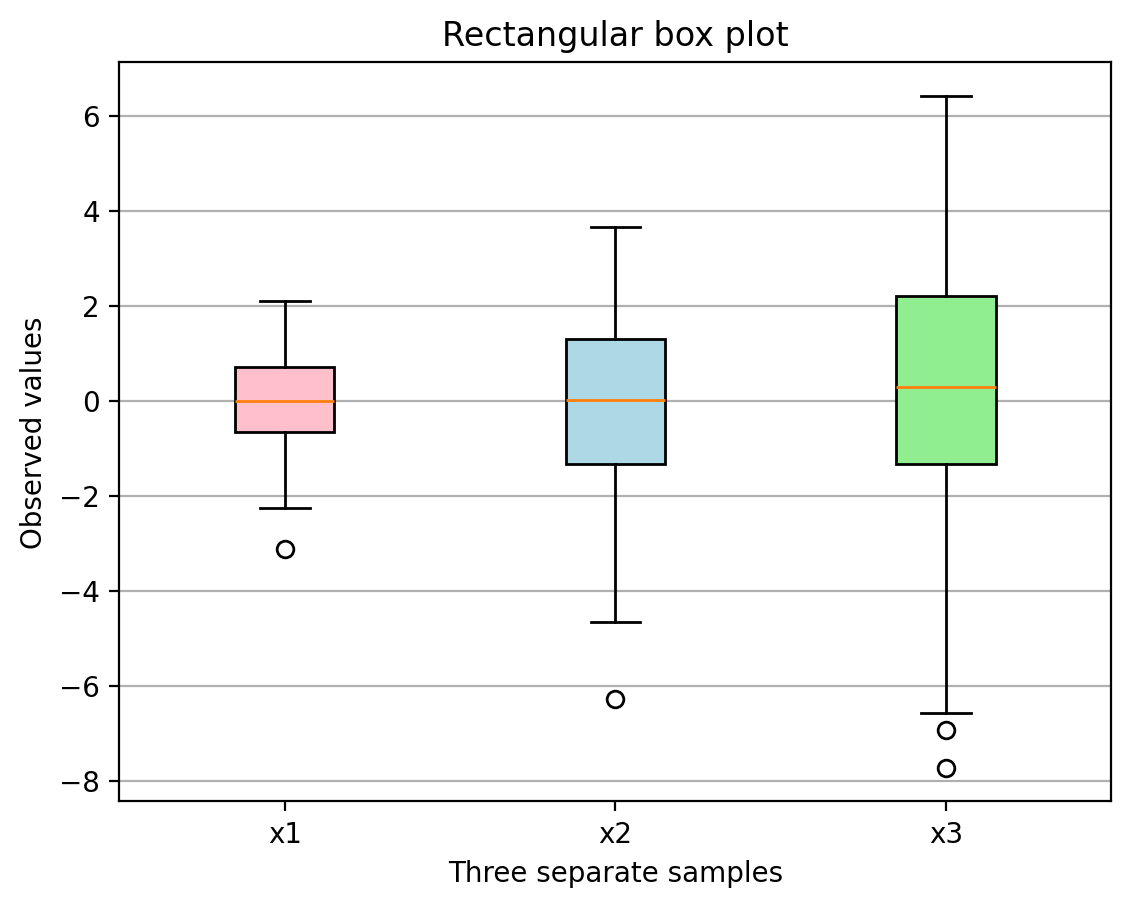

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# random test data
np.random.seed(19680801)

all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']

fig, ax = plt.subplots()

# rectangular box plot
bplot = ax.boxplot(all_data,
        patch_artist=True,  # draw the boxes as Patch objects (filled rectangles)
        labels = labels)
ax.set_title('Rectangular box plot')

# filled with colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
ax.yaxis.grid(True)
ax.set_xlabel('Three separate samples')
ax.set_ylabel('Observed values')

plt.show()


### histogram

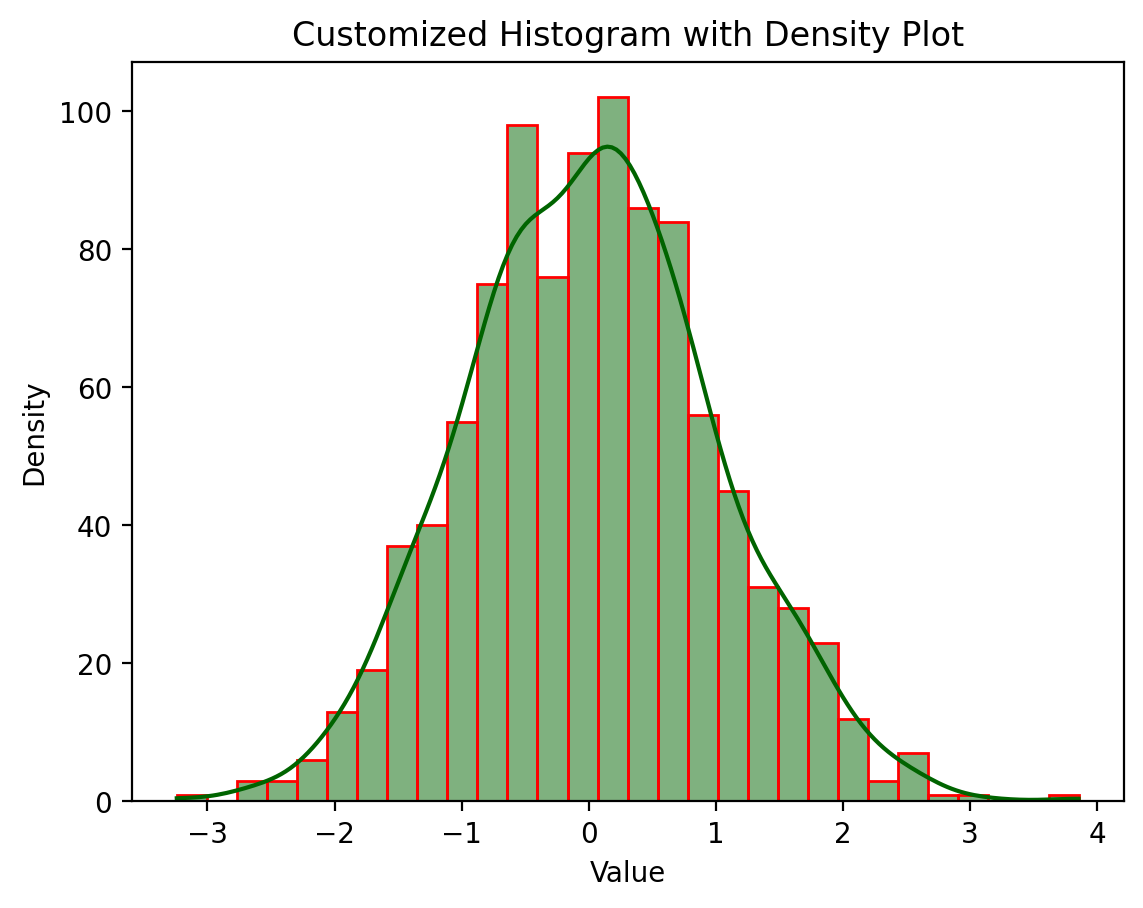

In [10]:
# generate random data for the histogram
np.random.seed(42)
data = np.random.randn(1000)  # normal distribution with mean of 0 and std of 1

# creating a customized histogram with a density plot
sns.histplot(data, bins=30, kde=True, color='darkgreen', edgecolor='red')

# adding labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Customized Histogram with Density Plot')

plt.show()

## Scaling data
### Definitions
- **normalization (min-max scaling)**: scale to [0, 1];
- **standardization**: scale to mean of 0 and std of 1;

### Code
- `MinMaxScaler` from `sklearn.preprocessing`
- `StandardScaler` from `sklearn.preprocessing`


In [11]:
# example of a normalization
from sklearn.preprocessing import MinMaxScaler

data = np.asarray([  # convert the list to numpy array
    [100, 0.001],
    [8, 0.05],
    [50, 0.005],
    [88, 0.07],
    [4, 0.1]
])
print(data)

# define the scaler
scaler = MinMaxScaler()

# fit and transform data
scaled = scaler.fit_transform(data)
print(scaled)

print(f"verification: {scaled.min()}, {scaled.max()}")
#

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]
verification: 0.0, 1.0


In [12]:
# example of standardizaiton
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
scaled2 = scaler2.fit_transform(data)
print(scaled2)
print(f"verification:{np.mean(scaled2)}, {np.std(scaled2)}")

[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]
verification:-2.2204460492503132e-17, 1.0


## Relations between variables
### Definitions
- **Covariance**:showing how one variable changes with respect to another; the **sign** tells us whether the variables are positively or negatively correlated, but **cannot quantify how strong** the relationship is;
- **Correlation**: showing both the directions and magnitude of the relationship between two variables; [-1, 1];

### Code
- correlation: `df.corr()`, where df is a Pandas dataframe; use `sns.heatmap` to visulize, where sns is seaborn pacakge

(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
                  mean radius  mean texture  mean perimeter  mean area  \
mean radius          1.000000      0.323782        0.997855   0.987357   
mean texture         0.323782      1.000000        0.329533   0.321086   
mean perimeter       0.997855      0.329533        1.000000   0.986507   
mean area            0.987357      0.321086        0.986507   1.000000   
mean smoothness      0.170581     -0.023389        0.207278   0.1

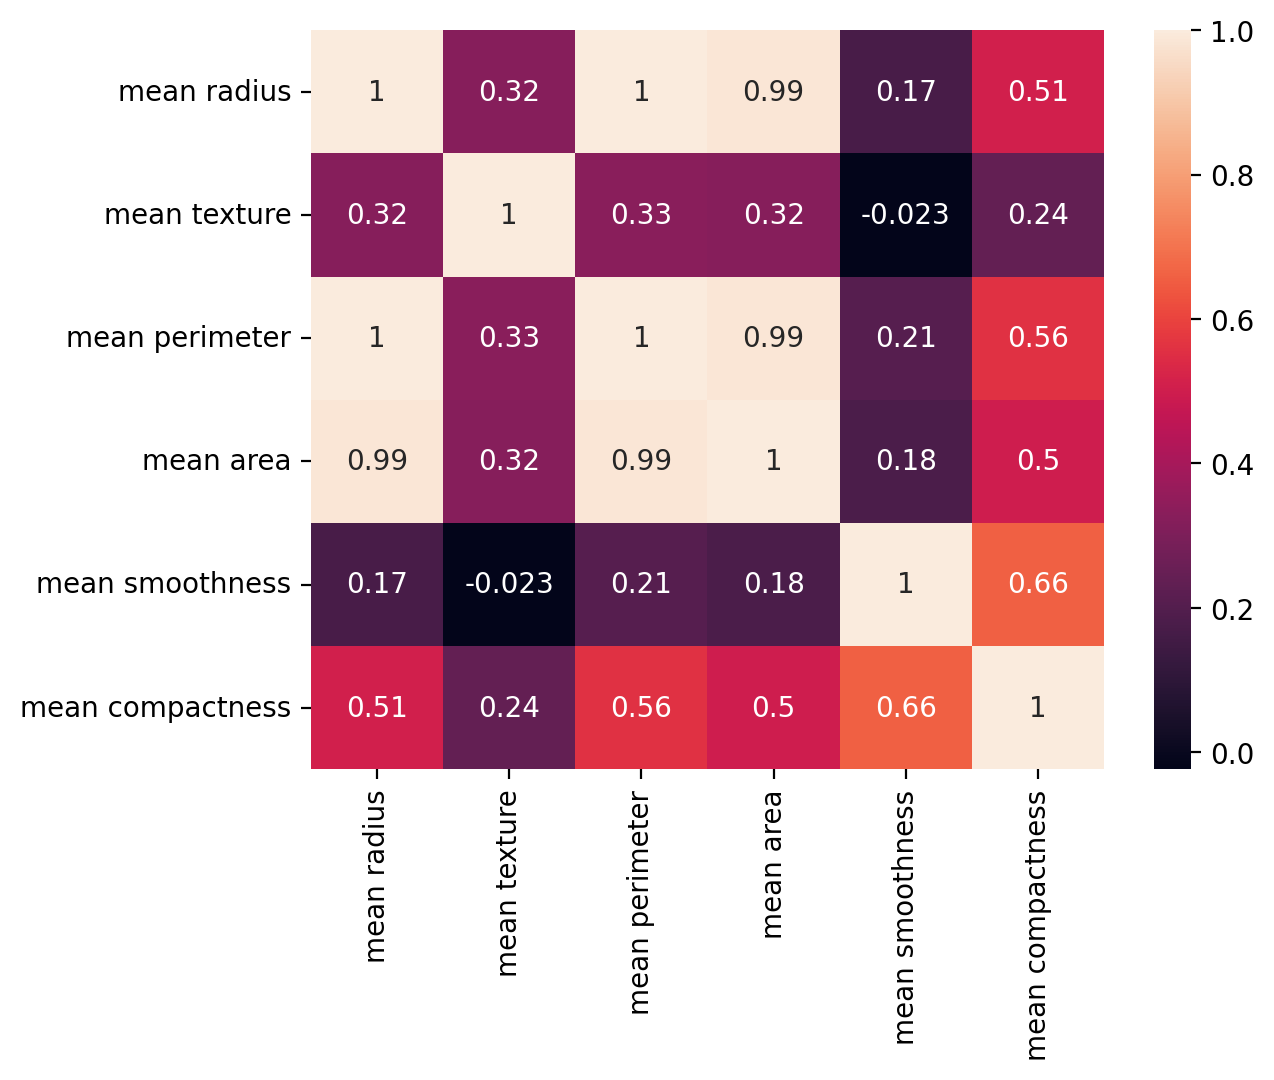

In [13]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

breast_cancer = load_breast_cancer()
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
print(df.shape)
print(breast_cancer.feature_names)

# taking all rows but only 6 columns
df_small = df.iloc[:,:6]
corr_mat = df_small.corr()
print(corr_mat)
#
sns.heatmap(corr_mat, annot=True)
plt.show()

## Python Basics


### data types

In [14]:
L1 = [True, "2", 3.0, 4]
[type(item) for item in L1]

[bool, str, float, int]

### Mutable & Immutable Objects
- All built-in simple Python objects are immutable;
- **Lists** and **Dicts** are mutable
- Function arguments are **passing by object**, which means that what happens to the variable within a function will depend on whether it is mutable or immutable

In [15]:
# simple objects are immutable
a = 2
print(id(a))

a = '2'
print(id(a))

11654408
11714720


In [16]:
# Lists are mutable
b = [1, 2, 3]
print(id(b))

b[0] = 9
print(b)

print(id(b))

138863532711936
[9, 2, 3]
138863532711936


In [17]:
c = ['a', 'b']
print(id(c))

c = c + ['c']  # out-of-place assignment, created new object

print(id(c))

c += ['d']  # in-place assignment, change in place
print(id(c))

c.append('e')  # append operation change in place
print(id(c))
#

138863532701312
138863532701376
138863532701376
138863532701376


In [18]:
# passing by objects
def passing_by_object(mylist):
    mylist += ['x']  # in-place operation

def passing_by_object2(mylist):
    mylist = mylist + ['x']  # out-of-place operation

mylist = ['a', 'b']

passing_by_object2(mylist)
print(mylist)

passing_by_object(mylist)
print(mylist)
#

['a', 'b']
['a', 'b', 'x']


### List Comprehension

In [19]:
[f"num{i}" for i in range(5) if i%2==0]

['num0', 'num2', 'num4']

## Numpy Basics

### creating numpy array

In [20]:
np.array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

In [21]:
np.arange(0, 10, 2)  # exclude 10 & int

array([0, 2, 4, 6, 8])

In [22]:
np.linspace(0, 10, 6)  # include 10 & float

array([ 0.,  2.,  4.,  6.,  8., 10.])

### random number
- `random`, uniform [0,1)
- `randint`, random integers
- `normal`, normal distribution, similar as `randn`

In [23]:
# uniform, [0.0, 1.0)
print(np.random.random((2,3)))

# randint
print(np.random.randint(0, 10, (2,3)))

# normal, mean, std, size
print(np.random.normal(0, 1, (2,3)))

[[0.16748258 0.10456784 0.63643025]
 [0.70647573 0.03158614 0.93621225]]
[[6 8 1]
 [7 7 1]]
[[ 1.26519725  0.55935921 -0.33541214]
 [ 2.41339392  0.65140928  1.97654427]]


### attributes of arrays

In [24]:
x = np.random.randint(10, size=(3,4))
print(x.ndim)
print(x.shape)
print(x.size)
print(x.dtype)

2
(3, 4)
12
int64


### reshape of array

In [25]:
grid = np.arange(1, 10).reshape((3,3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


### indexing of arrays
- using `[]`
- indexing  change in-place

In [26]:
x1 = np.arange(6)
print(x1, x1[0], x1[-1])

x2 = np.array([
    [1, 2],
    [3, 4]
])
print(x2, x2[0, 0], x2[1, -1])
print(id(x2))

# change in place
x2[0, 0] = 0
print(x2)
print(id(x2))

[0 1 2 3 4 5] 0 5
[[1 2]
 [3 4]] 1 4
138863428639536
[[0 2]
 [3 4]]
138863428639536


### slicing (subarray)
- using `[start:stop:step]`
- `step` can be negative
- multi-dimension using `,`
- for python list, slicing is **copy**; for numpy array, slicing is **view**; using `.copy` for explicitly copy

In [27]:
x = np.arange(10)
print(x, x[:5], x[5:], x[4:7], x[::2], x[1::2])

print(x[::-1])
print(x[5::-1])

[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4] [5 6 7 8 9] [4 5 6] [0 2 4 6 8] [1 3 5 7 9]
[9 8 7 6 5 4 3 2 1 0]
[5 4 3 2 1 0]


In [28]:
np.random.seed(42)
x2 = np.random.randint(10, size=(3,4))
print(x2)
print(x2[:2, :3])
print(x2[:3,::2])
print(x2[::-1, ::-1])
print(x2[:, 0], x2[1,:], x2[1])

[[6 3 7 4]
 [6 9 2 6]
 [7 4 3 7]]
[[6 3 7]
 [6 9 2]]
[[6 7]
 [6 2]
 [7 3]]
[[7 3 4 7]
 [6 2 9 6]
 [4 7 3 6]]
[6 6 7] [6 9 2 6] [6 9 2 6]


In [29]:
print(x2)
print(id(x2))

x2_sub = x2[:2, :2]
x2_sub[0, 0] = 99
x2[-1, -1] = 88

print(x2)
print(id(x2))

# explicitly copy
x2_sub_copy = x2[:2, :2].copy()
x2_sub_copy[0, 0] = 42
print(x2)  # unchanged

[[6 3 7 4]
 [6 9 2 6]
 [7 4 3 7]]
138863428902064
[[99  3  7  4]
 [ 6  9  2  6]
 [ 7  4  3 88]]
138863428902064
[[99  3  7  4]
 [ 6  9  2  6]
 [ 7  4  3 88]]


### Joining and splitting of arrays
- `concatenate` for joining; when the dim > 1, using `axis=1` for columns joining
- `split` for splitting

In [30]:
# one dimension
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])

print(np.concatenate([x, y]))  # parameters should be a sequence, list or tuple are both ok

# two dimensions
grid = np.arange(1, 7).reshape((2, 3))
print(np.concatenate([grid, grid]))
print(np.concatenate([grid, grid], axis=1))

# split
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3 3 2 1]
[[1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]]
[[1 2 3 1 2 3]
 [4 5 6 4 5 6]]
[1 2 3] [99 99] [3 2 1]


### Universal Functions
- `+` equals `np.add`
- `-` equals `np.subtract`
- ...

In [31]:
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

2.35 s ± 728 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
%timeit (1.0/big_array)

1.88 ms ± 195 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Aggregation
- `np.sum`
- `np.min`
- `np.max`
- ...

In [33]:
big_array = np.random.random(10000)
%timeit sum(big_array)  # pure python
%timeit np.sum(big_array)  # numpy

1.37 ms ± 874 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
8.36 µs ± 2.25 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [34]:
# short syntax
print(big_array.min(), big_array.max(), big_array.sum())

7.568353748910184e-05 0.9999925005444847 4990.08872228432


In [35]:
# two dimensions
M = np.random.random((3, 4))
print(M)
print(M.sum())
print(M.min())
print(M.min(axis=0))  # along the axis 0 (row)
print(M.min(axis=1))  # along the axis 1 (column)

print("")
print(M.argmin(axis=0))
print(M.argmax(axis=1))

[[0.41573718 0.08086468 0.02903943 0.79052915]
 [0.977284   0.31316845 0.72406328 0.42954113]
 [0.94408442 0.57395283 0.56403008 0.03868658]]
5.880981211535507
0.02903943158568989
[0.41573718 0.08086468 0.02903943 0.03868658]
[0.02903943 0.31316845 0.03868658]

[0 0 0 2]
[3 0 0]


### Broadcasting

In [36]:
a = np.arange(3)
b = np.arange(3).reshape((3,1))
print(a)
print(b)
print(a+b)

[0 1 2]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


### Mask
- using `<`, `>`... to generate a **Boolean Array**;
- using Boolean Array as a mask
- indexing by `[mask]` (fancy indexing)

In [37]:
# one dimension
x = np.arange(1, 6)
print(x)
print(x<3)

# two dimensions
x = np.arange(12).reshape((3,4))
print(x)
print(x<6)
print(x[x<6])  # returen 1D result; for keep the 2D shape, using `np.where`

[1 2 3 4 5]
[ True  True False False False]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ True  True  True  True]
 [ True  True False False]
 [False False False False]]
[0 1 2 3 4 5]


In [38]:
import numpy as np

x = np.arange(12).reshape((3,4))
print("Original array:\n", x)

# 创建布尔条件
condition = x < 6
print("\nBoolean mask:\n", condition)

# 使用 np.where() 保留形状
# 不满足条件的元素会被设置为 np.nan
result_with_shape_nan = np.where(condition, x, np.nan)
print("\nResult preserving shape (filling with NaN):\n", result_with_shape_nan)

# 不满足条件的元素会被设置为 0
result_with_shape_zero = np.where(condition, x, 0)
print("\nResult preserving shape (filling with 0):\n", result_with_shape_zero)

Original array:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Boolean mask:
 [[ True  True  True  True]
 [ True  True False False]
 [False False False False]]

Result preserving shape (filling with NaN):
 [[ 0.  1.  2.  3.]
 [ 4.  5. nan nan]
 [nan nan nan nan]]

Result preserving shape (filling with 0):
 [[0 1 2 3]
 [4 5 0 0]
 [0 0 0 0]]


在上述这个例子中：
- `condition` 是一个形状与 `x` 相同的布尔数组。
- `np.where(condition, x, np.nan)` 会遍历 `condition`。
  - 如果 `condition` 中的元素为 `True`，则取 `x` 中对应位置的元素值。
  - 如果 `condition` 中的元素为 `False`，则用 `np.nan` 填充对应位置。

这样，你就可以得到一个形状不变的 2D 数组，其中只有满足条件的元素保留了原值，不满足条件的元素则被替换为指定的值（如 `NaN` 或 0）。

### Fancy indexing
passing arrays of indices

In [39]:
np.random.seed(42)

# one dimension
x = np.random.randint(100, size=10)
print(x)
print(x[[3, 7, 4]])

# two dimensions
X = np.arange(12).reshape((3, 4))
print(X)

row = [0, 1, 2]
column = [2, 1, 3]
print(X[row, column])

# combined indexing
print("")
print(X[2,[2, 0, 1]])
print(X[1:,[2, 0, 1]])

mask = np.array([1, 0, 1, 0], dtype=bool)
print("")
print(X[np.array([0, 1, 2]).reshape((3, 1)), mask])

[51 92 14 71 60 20 82 86 74 74]
[71 86 60]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 2  5 11]

[10  8  9]
[[ 6  4  5]
 [10  8  9]]

[[ 0  2]
 [ 4  6]
 [ 8 10]]


### Sort
- `np.sort`
- `np.argsort`
- `np.partition`, partial sorts, with the smallest K values to the left of the partition, and the remaining values to the right, in **arbitrary** order

In [40]:
X = np.array([7, 2, 3, 1, 6, 5, 4])
print(np.partition(X, 3))

# without modifying the input
x = np.array([2, 1, 4, 3, 5])
print(np.sort(x))
print(np.argsort(x))
print(x)
print("")

# combining argsort with fancy indexing
i = np.argsort(x)
print(x[i])

# sort in-place
x.sort()
print(x)


[1 2 3 4 5 6 7]
[1 2 3 4 5]
[1 0 3 2 4]
[2 1 4 3 5]

[1 2 3 4 5]
[1 2 3 4 5]


## Pandas Basics


### DataFrame & Series
- **DataFrame**, 2D table, pandas  data table representation
- **Series**, 1D, Each column in `DataFrame` is a `Series`;

In [44]:
df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"],
    }
)
print(df)

                       Name  Age     Sex
0   Braund, Mr. Owen Harris   22    male
1  Allen, Mr. William Henry   35    male
2   Bonnell, Miss Elizabeth   58  female


In [46]:
ages = pd.Series([22, 35, 58], name="Age")
print(ages)

0    22
1    35
2    58
Name: Age, dtype: int64


In [47]:
# do something with a DataFrame or Series
df["Age"].max()

58

In [48]:
df.describe()

,Age
count,3.000000
mean,38.333333
std,18.230012
min,22.000000
25%,28.500000
50%,35.000000
75%,46.500000
max,58.000000


### read and write tabular data
- `read_csv`, and `to_csv`
- `read_excel` and `to_excel`


In [49]:
titanic = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Indexing & Broadcasting

In [42]:
import pandas as pd

print(pd.__version__)
print("")

# avoid this. continuous and aligned index is recommended
s1 = pd.Series([10, 20, 30], index=[1, 2, 2])
s2 = pd.Series([35, 44, 53], index=[2, 2, 4], name='s2')
print(s1)
print(s2)
print(s1+s2)

2.2.2

1    10
2    20
2    30
dtype: int64
2    35
2    44
4    53
Name: s2, dtype: int64
1     NaN
2    55.0
2    64.0
2    65.0
2    74.0
4     NaN
dtype: float64


### Select columns
- `df.mag` attribution notation; syntax sugar
- `df['mag']` dictionary notation; **recommended**

In [45]:
df["Age"]

,Age
0,22
1,35
2,58


### Filter specific rows
- `df[mask]` return approprite rows

In [50]:
above_35 = titanic[titanic["Age"] > 35]
above_35.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


### Select specific rows and columns
- `df.loc`, label-based selection;
- `df.iloc`, position-based selection;

In [51]:
adult_names = titanic.loc[titanic["Age"] > 35, "Name"]
adult_names.head()

,Name
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
6,"McCarthy, Mr. Timothy J"
11,"Bonnell, Miss Elizabeth"
13,"Andersson, Mr. Anders Johan"
15,"Hewlett, Mrs. (Mary D Kingcome)"


In [52]:
titanic.iloc[9:25, 2:5]

,Pclass,Name,Sex
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female
10,3,"Sandstrom, Miss Marguerite Rut",female
11,1,"Bonnell, Miss Elizabeth",female
12,3,"Saundercock, Mr. William Henry",male
13,3,"Andersson, Mr. Anders Johan",male
14,3,"Vestrom, Miss Hulda Amanda Adolfina",female
15,2,"Hewlett, Mrs. (Mary D Kingcome)",female
16,3,"Rice, Master Eugene",male
17,2,"Williams, Mr. Charles Eugene",male
18,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female


### Create new columns derived from exsiting columns

In [53]:
air_quality = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/refs/heads/main/doc/data/air_quality_no2.csv")
air_quality.head()

,datetime,station_antwerp,station_paris,station_london
0,2019-05-07 02:00:00,NaN,NaN,23.0
1,2019-05-07 03:00:00,50.5,25.0,19.0
2,2019-05-07 04:00:00,45.0,27.7,19.0
3,2019-05-07 05:00:00,NaN,50.4,16.0
4,2019-05-07 06:00:00,NaN,61.9,NaN


In [54]:
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
air_quality.head()

,datetime,station_antwerp,station_paris,station_london,london_mg_per_cubic
0,2019-05-07 02:00:00,NaN,NaN,23.0,43.286
1,2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2,2019-05-07 04:00:00,45.0,27.7,19.0,35.758
3,2019-05-07 05:00:00,NaN,50.4,16.0,30.112
4,2019-05-07 06:00:00,NaN,61.9,NaN,NaN


In [55]:
air_quality["ratio_paris_antwerp"] = (
    air_quality["station_paris"] / air_quality["station_antwerp"]
)
air_quality.head()

,datetime,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
0,2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
1,2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2,2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
3,2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
4,2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [56]:
air_quality_renamed = air_quality.rename(
    columns={
        "station_antwerp": "BETR801",
        "station_paris": "FR04014",
        "station_london": "London Westminster",
    }
)
air_quality_renamed.head()
#

,datetime,BETR801,FR04014,London Westminster,london_mg_per_cubic,ratio_paris_antwerp
0,2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
1,2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2,2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
3,2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
4,2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


### Calculate summary statistics

In [57]:
titanic["Age"].mean()

np.float64(29.69911764705882)

In [58]:
titanic[["Age", "Fare"]].median()

,0
Age,28.0000
Fare,14.4542


In [59]:
titanic[["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


In [60]:
titanic.groupby("Sex")["Age"].mean()
#

,Age
Sex,
female,27.915709
male,30.726645


In [61]:
titanic["Pclass"].value_counts()

,count
Pclass,
3,491
1,216
2,184


### Plot

<Axes: >

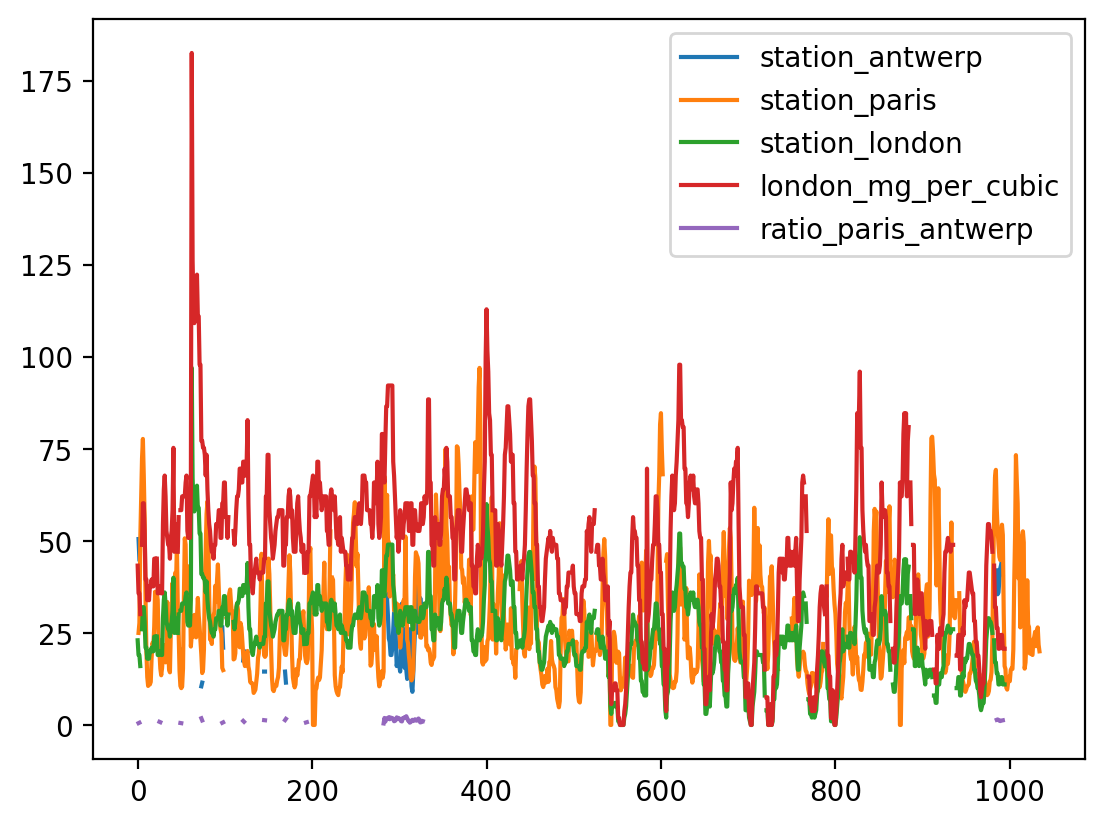

In [63]:
air_quality.plot()

<Axes: >

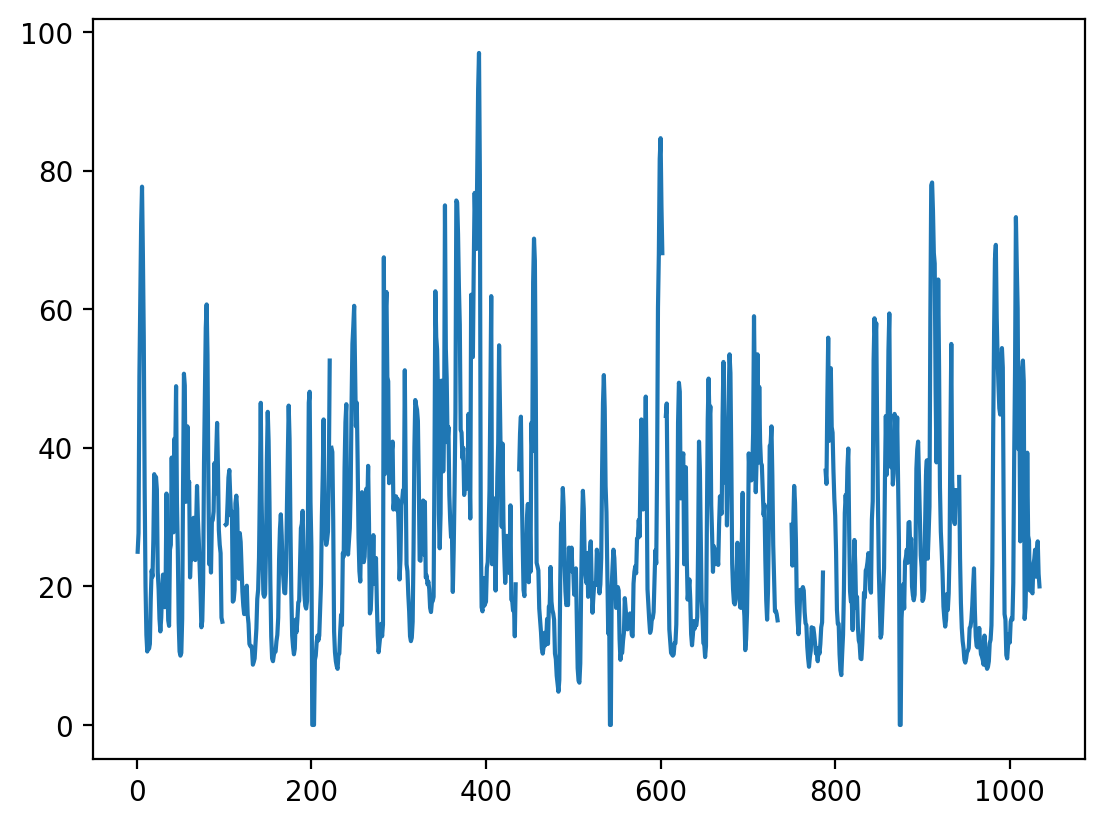

In [64]:
air_quality["station_paris"].plot()

<Axes: xlabel='station_london', ylabel='station_paris'>

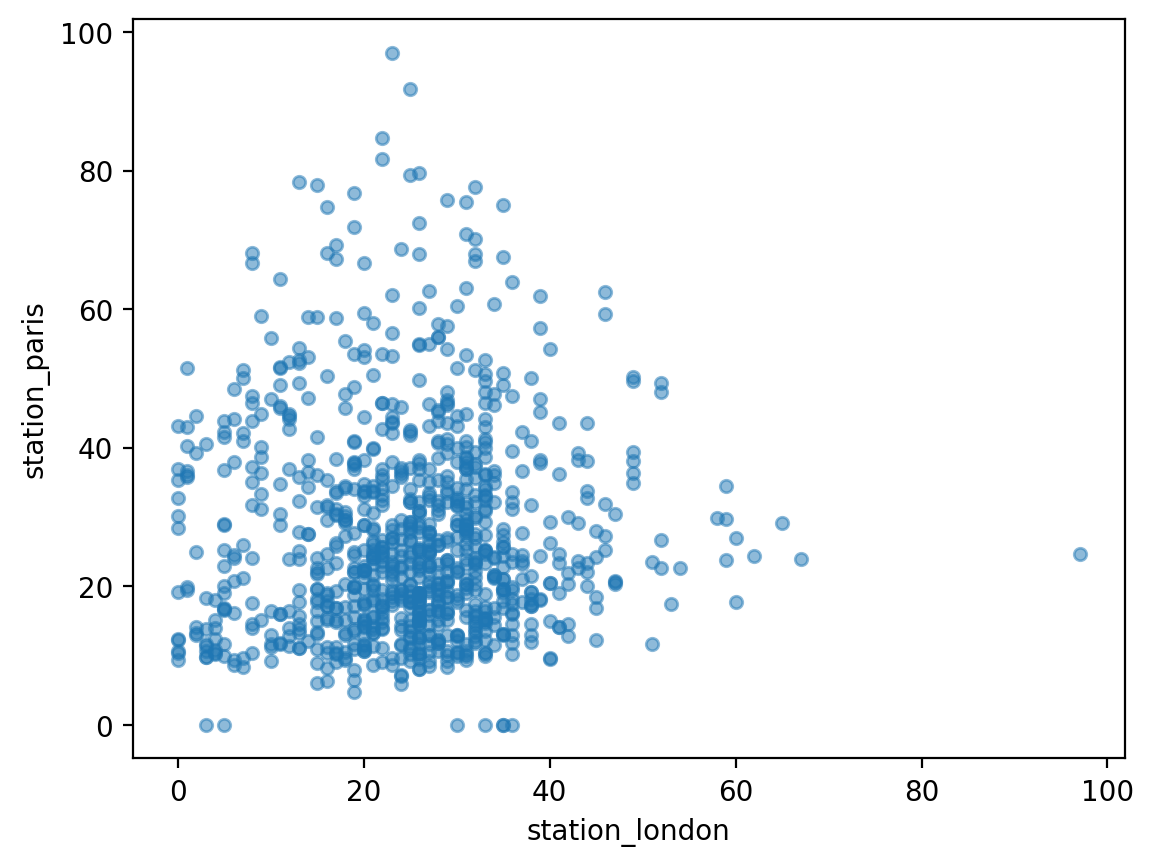

In [65]:
air_quality.plot.scatter(x="station_london", y="station_paris", alpha=0.5)
#

<Axes: >

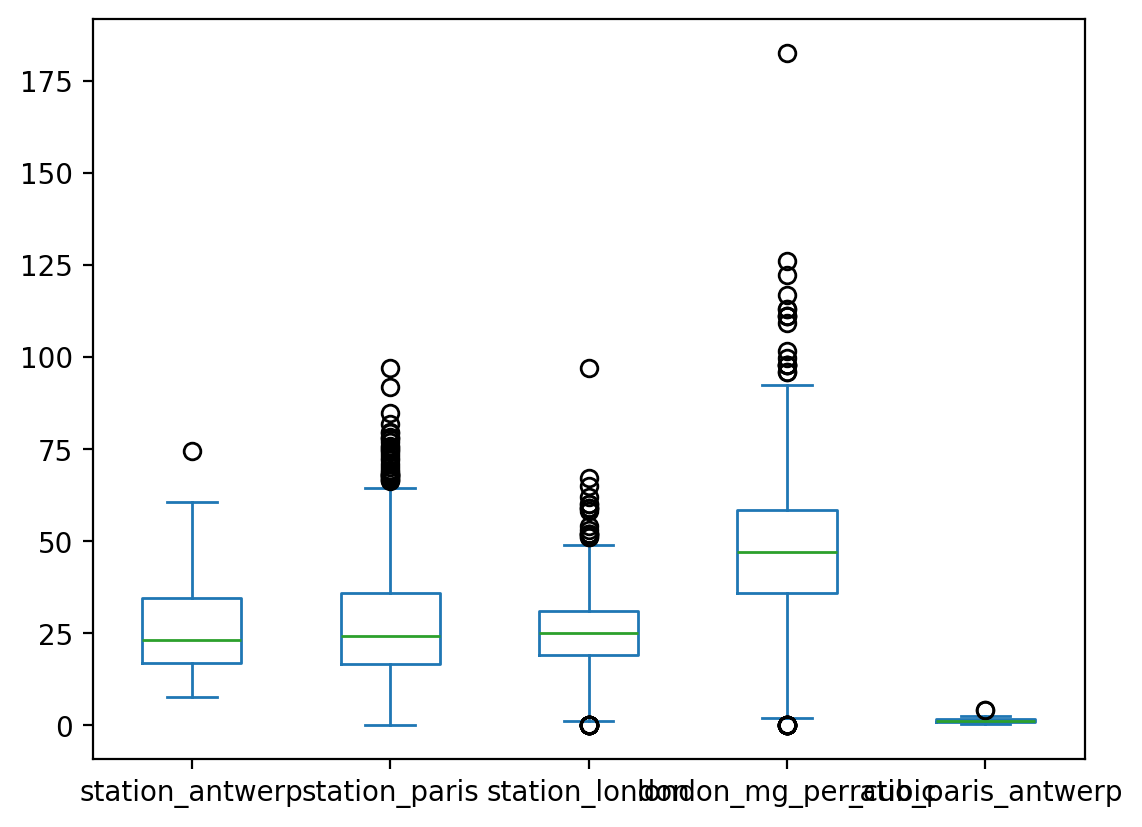

In [66]:
air_quality.plot.box()

## PyTorch

In [67]:
import torch

scalar = torch.tensor(3.14159)
vector = torch.tensor([1, 2, 3])
matrix = torch.ones((2,3), dtype=torch.float)
tensor = torch.randn((2,3,4), dtype=torch.float)

print(scalar)
print(vector)
print(matrix)
print(tensor)

tensor(3.1416)
tensor([1, 2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[[-0.4611,  0.6249, -1.4156, -0.0385],
         [-1.8567,  0.8449, -1.6910,  0.7594],
         [-0.1031,  1.3184, -1.1636, -1.1183]],

        [[-0.4993, -0.3746, -0.7218, -0.6559],
         [-0.2009,  0.0129, -0.1473,  0.5656],
         [-1.2050, -0.2878,  0.0675, -0.0259]]])


In [68]:
# view
same_matrix = matrix.view(1, 6)  # get a tensor with different shape but it still is
same_matrix[0, 1] = 2
print(matrix)
print(same_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 2., 1., 1., 1., 1.]])


In [69]:
# duplicate data
another_matrix = matrix.view(1, 6).clone().detach()
another_matrix[0, 1] = 4
print(matrix)
print(another_matrix)
#

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 4., 1., 1., 1., 1.]])


In [71]:
# numpy <--> torch
dummy_array = np.array([1, 2, 3])
dummy_tensor = torch.as_tensor(dummy_array)  # `as_sensor` share the memory (change in place)
dummy_array[1] = 0
dummy_tensor

tensor([1, 0, 3])

In [73]:
data = [
    [1, 2],
    [3, 4]
]
tensor_data = torch.tensor(data)  # `tensor` copy the data
tensor_data[0, 1] = 1

print(data)
print(tensor_data)

[[1, 2], [3, 4]]
tensor([[1, 1],
        [3, 4]])


In [72]:
back_to_numpy = dummy_tensor.numpy()
back_to_numpy

array([1, 0, 3])